In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import cv2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [119]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow import keras 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import sklearn
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import tensorflow

In [202]:
img_height, img_width = (224,224)
batch_size = 32
IMG_SHAPE = (img_height,img_width,3)
train_data_dir = r"/content/drive/MyDrive/Augmeny_Trial_output.after.splitting/train"
valid_data_dir = r"/content/drive/MyDrive/Augmeny_Trial_output.after.splitting/val"
test_data_dir = r"/content/drive/MyDrive/Augmeny_Trial_output.after.splitting/test"
#test_data_dir = r"/content/drive/MyDrive/outputfolder/test"
#image.open()

In [121]:

train_datagen = ImageDataGenerator(
                                     shear_range=0.2,zoom_range=0.2,
                                 horizontal_flip=True,
                                   validation_split=0.4,
                                    rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size = batch_size, 
                                                      class_mode='categorical')
                       
                                       #   subset='training')# set as training data

valid_generator = train_datagen.flow_from_directory(valid_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size = batch_size, 
                                                    class_mode='categorical')
                                                    #subset='validation') #set as validation data  
                                                                                                       

Found 3074 images belonging to 4 classes.
Found 383 images belonging to 4 classes.


In [122]:
train_generator.class_indices

{'center': 0, 'closed': 1, 'left': 2, 'right': 3}

In [123]:
y_train = train_generator.classes
len(y_train)

3074

In [124]:
nb_validation_samples = 383

In [125]:
dir(train_generator)
#type(train_generator.labels)
print(train_generator.classes)
#y_train = train_generator.classes
y_train = train_generator.classes
y_train.shape

[0 0 0 ... 3 3 3]


(3074,)

In [126]:
test_generator = train_datagen.flow_from_directory(test_data_dir,
                                                    target_size=(img_height, img_width),
                                   
                                                   batch_size = 1, 
                                                    class_mode='categorical')
                                                    #subset='validation') #set as testing data

Found 388 images belonging to 4 classes.


In [127]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [128]:
import math
import numpy as np
import scipy
import h5py
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization  
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from matplotlib.pyplot import imshow
def Gaip_model_2b(input_shape, outputClasses):
  
    #X_input = keras.Input(shape=(224, 224, 3))
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
   # X_2 = X
    
    # Stage 0
    #X = Conv2D(16, (3, 3), strides=(1, 1), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
   # X = BatchNormalization(axis=3, name='bn_conv1')(X)
   #X = Activation('relu')(X)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    
    X_2 = X
    #stage1:
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    #stage2:
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    #shortpath:
    X_2 = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X_2)
    X_2 = MaxPooling2D((3, 3), strides=(2, 2))(X_2)
    X_2 = BatchNormalization(axis=3)(X_2)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Add()([X,X_2])
    X = Activation('relu')(X)
    
    #stage3:
    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = BatchNormalization(axis=3)(X)
    
    #shortpath:
    X_2 = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X_2)
    X_2 = MaxPooling2D((3, 3), strides=(2, 2))(X_2)
    X_2 = BatchNormalization(axis=3)(X_2)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Add()([X,X_2])
    X = Activation('relu')(X)
    
    X = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)    
    X = Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    #avg_pooling
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    #flattening
    X = Flatten()(X)
    #fully_connected
    X = Dense(1024, activation='relu', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dense(4, activation='sigmoid')(X)
    
    model = Model(inputs = X_input, outputs=X, name='Gaip_model_2b')
    return model

In [129]:
model = Gaip_model_2b(input_shape = (224,224,3), outputClasses =4)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','mse'])
model.summary()

Model: "Gaip_model_2b"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_15 (Conv2D)             (None, 230, 230, 32  896         ['zero_padding2d_1[0][0]']       
                                )                                                     

In [ ]:
# 50 epochs for Resnet50 model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

#checkpointing
#checkpoint_path = "/content/drive/MyDrive/cp-0021.ckpt.data-00000-of-00001"
#checkpoint_path = "C:/Users/DHANVANTH/SAMSUNG/Resnet/cp-0021.ckpt.data-00000-of-00001"
checkpoint_path = "/content/drive/MyDrive/cp-0021.ckpt.data-00000-of-00001"
checkpoint_dir = os.path.dirname(checkpoint_path)

#Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(monitor ='val_accuracy',
   filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    #save_freq=5*batch_size,
     save_best_only = True,                                                    
      mode='max')


#Reduce learning rate when a metric has stopped improving.
# Models often benefit 
#from reducing the learning rate by a factor of 2-10
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.2, patience=2, min_lr=0.00001)



# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model_history = model.fit(train_generator, epochs = 20 ,callbacks=[cp_callback, reduce_lr],
                          validation_data=valid_generator,
    validation_steps=nb_validation_samples // batch_size)
           # Pass callback to training

In [130]:
#model.save('/content/drive/MyDrive/models/vgg19+resnet.h5')
model_1 = tensorflow.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/vgg19+resnet.h5')

In [ ]:
def plot_accuracy_loss(history):
    
    fig = plt.figure(figsize=(10,5))

    plt.subplot(221)
    #plt.plot(history.history['accuracy'],'bo--', label = "train_acc")
    plt.plot(history.history['accuracy'],marker = ',',ms = 10, label = "train_acc")
    plt.plot(history.history['val_accuracy'], marker = ',', label = "val_acc")
    plt.title("(train_acc & val_acc) vs epoch")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    plt.subplot(222)
    plt.plot(history.history['loss'],marker= ',', label = "train_loss")
    plt.plot(history.history['val_loss'], marker=',' , label = "val_loss")
    plt.title("(train_loss & val_loss) vs epoch")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    f = plt.figure()
    plt.show()
  


plot_accuracy_loss(model_history)
f = plt.figure()
#f.savefig('C:/Users/DHANVANTH/SAMSUNG/resnet_50_epoch_vs_acc', bbox_inches='tight', dpi=600)

In [ ]:
#to plot confusion matrix for 100 epochs
import pandas as pd
import seaborn as sn
import tensorflow as tf

#model = tf.keras.models.load_model("Reflection_dataset\Saved_Model\Mobilenet_reflection.h5")
#model = model_1
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns = ['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,cmap="YlGnBu", annot = True,fmt='d')
plt.show()
print('test accuracy: {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [ ]:
# 50 epochs for Resnet50 model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

#checkpointing
#checkpoint_path = "/content/drive/MyDrive/cp-0021.ckpt.data-00000-of-00001"
#checkpoint_path = "C:/Users/DHANVANTH/SAMSUNG/Resnet/cp-0021.ckpt.data-00000-of-00001"
checkpoint_path = "/content/drive/MyDrive/cp-0021.ckpt.data-00000-of-00001"
checkpoint_dir = os.path.dirname(checkpoint_path)

#Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(monitor ='val_accuracy',
   filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    #save_freq=5*batch_size,
     save_best_only = True,                                                    
      mode='max')


#Reduce learning rate when a metric has stopped improving.
# Models often benefit 
#from reducing the learning rate by a factor of 2-10
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.2, patience=2, min_lr=0.00001)



# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model_history = model.fit(train_generator, epochs = 30 ,callbacks=[cp_callback, reduce_lr],
                          validation_data=valid_generator,
    validation_steps=nb_validation_samples // batch_size)
           # Pass callback to training

In [ ]:
model.save('/content/drive/MyDrive/models/vgg19+resnet_next30.h5')
model_1 = tensorflow.keras.models.load_model('/content/drive/MyDrive/models/vgg19+resnet_next30.h5')

In [ ]:
def plot_accuracy_loss(history):
    
    fig = plt.figure(figsize=(10,5))

    plt.subplot(221)
    #plt.plot(history.history['accuracy'],'bo--', label = "train_acc")
    plt.plot(history.history['accuracy'],marker = ',',ms = 10, label = "train_acc")
    plt.plot(history.history['val_accuracy'], marker = ',', label = "val_acc")
    plt.title("(train_acc & val_acc) vs epoch")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    plt.subplot(222)
    plt.plot(history.history['loss'],marker= ',', label = "train_loss")
    plt.plot(history.history['val_loss'], marker=',' , label = "val_loss")
    plt.title("(train_loss & val_loss) vs epoch")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    f = plt.figure()
    plt.show()
  


plot_accuracy_loss(model_history)
f = plt.figure()
#f.savefig('C:/Users/DHANVANTH/SAMSUNG/resnet_50_epoch_vs_acc', bbox_inches='tight', dpi=600)


In [204]:
model_1 = tensorflow.keras.models.load_model('/content/drive/MyDrive/models/vgg19_finetuning.h5')

In [203]:
def create_model():

  base_model_3 = tensorflow.keras.applications.vgg19.VGG19(include_top = False, weights='imagenet',input_shape=IMG_SHAPE)#2ND CHANGE
 
 #the top layer is false coz we want to classify our own classes
#we use weights from imagenet(pre-trained weights) to classify our model
  x = base_model_3.output
#taking the top layer of Resnet50 and connecting with dense layers
  x = GlobalAveragePooling2D()(x)

  x = Dense(1024, activation='relu')(x)
  predictions = Dense(train_generator.num_classes, activation='softmax')(x)
  model = Model(inputs=base_model_3.input, outputs=predictions)

  for layer in base_model_3.layers:
    layer.trainable = False
    
  opt = keras.optimizers.Adam(learning_rate=0.0001)#learning rate as 0.01
  model.compile(loss='categorical_crossentropy', optimizer=opt,
               metrics = ['accuracy','mse'])

  #model.compile(optimizer='adam', loss='categorical_crossentropy', 
            #   metrics = ['accuracy','mse'])
 # model.fit(train_generator, epochs = 10)
  return model

model = create_model()
model.summary()

80150528/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
#to plot confusion matrix for 100 epochs
import pandas as pd
import seaborn as sn
import tensorflow as tf

#model = tf.keras.models.load_model("Reflection_dataset\Saved_Model\Mobilenet_reflection.h5")
model = model_1
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns = ['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,cmap="YlGnBu", annot = True,fmt='d')
plt.show()
print('test accuracy: {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [207]:
result = model_1.evaluate(test_generator)
dict(zip(model_1.metrics_names,result))

388/388 [==============================] - 9s 20ms/step - loss: 1.3493 - accuracy: 0.3067 - mse: 0.1834


{'accuracy': 0.30670103430747986,
 'loss': 1.3493473529815674,
 'mse': 0.18340416252613068}

In [133]:
prediction = model_1.predict(X_test[:1])
print("prediction shape:", prediction.shape)

prediction shape: (1, 4)


In [134]:
prediction = model_1.predict(X_test[:4])
print("prediction shape:", prediction.shape)

prediction shape: (1, 4)


In [ ]:
X_test[:4].shape

In [ ]:
prediction.argmax()

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import asarray
import cv2

In [ ]:
photo = load_img('/content/drive/MyDrive/augmented_image_74.jpg', target_size=(224, 224))

In [ ]:
photo

In [ ]:
photo = img_to_array(photo)


In [ ]:
photo_1 = load_img('/content/drive/MyDrive/augmented_image_57.jpg', target_size=(224, 224))

In [ ]:
photo_1

In [ ]:
photo_1 = img_to_array(photo_1)

In [ ]:
photos = list()
photos.append(photo_1)
photos.append(photo)

photos = asarray(photos)

In [ ]:
photos.shape

In [ ]:
#{'center': 0, 'closed': 1, 'left': 2, 'right': 3}

In [ ]:
prediction = model_1.predict(photos[:2])
print("prediction :", prediction.argmax())

In [ ]:
prediction = model_1.predict(photos[:1])
print("prediction:", prediction.argmax())

In [208]:
#to turn on camera
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


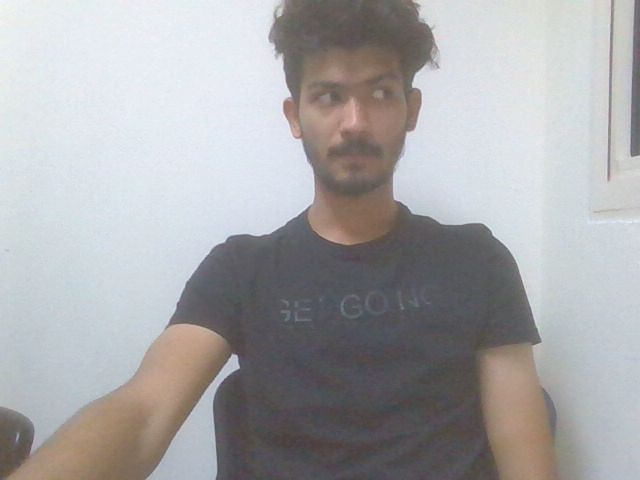

In [209]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [210]:
photo_2 = load_img('/content/photo.jpg', target_size=(224, 224))

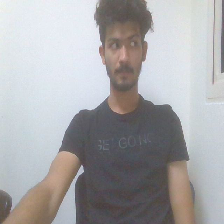

In [211]:
photo_2

In [212]:
photo_2 = img_to_array(photo_2)

In [213]:
photos = list()
#photos.append(photo_1)
#photos.append(photo)
photos.append(photo_2)
photos = asarray(photos)

In [ ]:
#{'center': 0, 'closed': 1, 'left': 2, 'right': 3}

[[286  45 139 139]]
check
[[22 28 44 44]
 [73 28 41 41]]


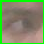

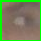

In [214]:

#final

import numpy as np
import cv2

#face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

#img = cv2.imread('elon.jpg')

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/models/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/models/haarcascade_eye.xml')
#img = cv2.imread('C:/Users/DHANVANTH/OpenCV-Face-and-Eye-Detection-master/elon.jpg')
img = cv2.imread('/content/photo.jpg')
#img = cv2.imread('G:/Output_folder/train/center_eyes_aug/_14_987240.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    #cv2_imshow('img',roi_color)
    print('check')
    eyes = eye_cascade.detectMultiScale(roi_color)
    print(eyes)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        roi_gray_e = gray[ey:ey+eh, ex:ex+ew]
        roi_color_e = roi_color[ey:ey+eh, ex:ex+ew]
        #roi_col_e = img[40:60, 55:100]
        cv2_imshow(roi_color_e)
cv2.waitKey(0)
cv2.destroyAllWindows()

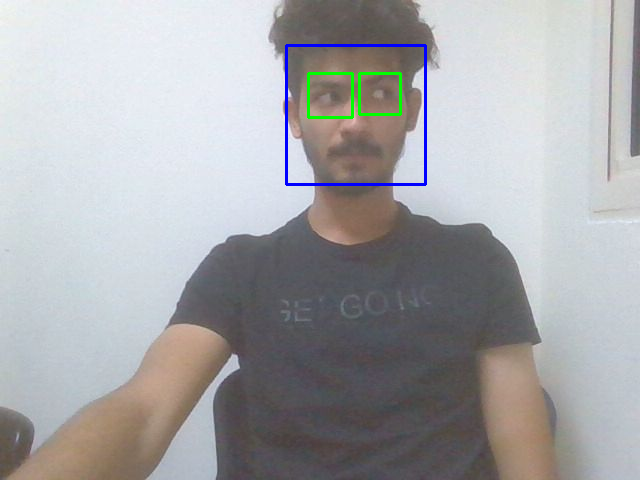

In [215]:
cv2_imshow(img)

In [ ]:
from google.colab.patches import cv2_imshow

In [216]:
cv2.imwrite("roi.jpg",roi_color_e)

True

In [217]:
photo_3 = load_img('/content/roi.jpg', target_size=(224, 224))

In [218]:
photo_3 = img_to_array(photo_3)

In [219]:
photos = list()
#photos.append(photo_1)
#photos.append(photo)
photos.append(photo_3)
photos = asarray(photos)

In [221]:
prediction = model_1.predict(photos[:2])
print("prediction shape is:",prediction.shape)
print("prediction values:", prediction)
print("prediction: ", prediction.argmax())

prediction shape is: (1, 4)
prediction values: [[2.2041382e-30 8.7688198e-14 7.2970363e-31 1.0000000e+00]]
prediction:  3


In [222]:
prediction = model_1.predict(photos[:1])
print("prediction shape is:",prediction.shape)
print("prediction values:", prediction)
print("prediction: ", prediction.argmax())

prediction shape is: (1, 4)
prediction values: [[2.2041382e-30 8.7688198e-14 7.2970363e-31 1.0000000e+00]]
prediction:  3


In [225]:
photos.shape

(1, 224, 224, 3)

array([[[[  7., 254.,   0.],
         [  7., 254.,   0.],
         [  7., 254.,   0.],
         ...,
         [  0., 255.,   0.],
         [  0., 255.,   0.],
         [  0., 255.,   0.]],

        [[  7., 254.,   0.],
         [  7., 254.,   0.],
         [  7., 254.,   0.],
         ...,
         [  0., 255.,   0.],
         [  0., 255.,   0.],
         [  0., 255.,   0.]],

        [[  7., 254.,   0.],
         [  7., 254.,   0.],
         [  7., 254.,   0.],
         ...,
         [  0., 255.,   0.],
         [  0., 255.,   0.],
         [  0., 255.,   0.]],

        ...,

        [[  0., 255.,   0.],
         [  0., 255.,   0.],
         [  0., 255.,   0.],
         ...,
         [ 11., 253.,  11.],
         [ 11., 253.,  11.],
         [ 11., 253.,  11.]],

        [[  0., 255.,   0.],
         [  0., 255.,   0.],
         [  0., 255.,   0.],
         ...,
         [ 11., 253.,  11.],
         [ 11., 253.,  11.],
         [ 11., 253.,  11.]],

        [[  0., 255.,   0.],
       